In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import imread
from pylab import rcParams
from bbox_comparator import parse_txt
from bbox_comparator import get_alerts
rcParams['figure.figsize'] = 50, 100

In [2]:
def frame_to_path(video_name, frame_num, img_path="./frames_in"):
    dir_A = str(int(frame_num / 10000))
    dir_B = str(int(frame_num / 100))
    path = os.path.join(img_path, video_name,  dir_A, dir_B, "{}.jpg".format(frame_num))
    return path

In [3]:
def visualize_frame(video_name, frame_num, boxes):
    im_path = frame_to_path(video_name, frame_num)
    img = imread(im_path)
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.imshow(img)
    
    for box in boxes:
        x1 = box["xmin"]
        y1 = box["ymin"]
        width = box["xmax"] - x1
        length = box["ymax"] - y1
        label = box["label"]
        color = "green"
        rectangle = plt.Rectangle((x1,y1), width,length, fill=False, edgecolor=color, linewidth=1)
        ax.add_patch(rectangle)
        ax.text(x1, y1 - 2, label,
                bbox=dict(facecolor=color, alpha=0.5),
                fontsize=14, color='white')

    plt.axis("off")
    plt.show()
    

In [25]:
#We ignore video_name in this version

def get_alert_boxes(video_name, frame):
    alert = alerts[video_name][frame]
    
    boxes = []
    
    for worker, max_IOU_talbe in alert["isolation"].items():
        for objID, max_IOU in max_IOU_talbe.items():
            boxes
        
    
    
    
    return boxes


def visualize_alert(video_name, frame, alerts):
    im_path = frame_to_path(video_name, frame_num)
    img = imread(im_path)
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.imshow(img)
    
    new_boxes = []
    
    isolation_info = alerts[video_name][frame]["isolation"]
    
    for worker, worker_isolation_info  in isolation_info.items():
        for objID, bad_matchings in worker_isolation_info.items():
            new_box = annotations_map[video_name][worker][frame][objID].copy()
            
            new_box["source"] = worker
            new_box["id"] = objID
            new_box["bad_matchings"] = bad_matchings
            
            
            new_boxes.append(new_box)
         
    
    
 
    for box in new_boxes:
        
        x1 = box["xmin"]
        y1 = box["ymin"]
        width = box["xmax"] - x1
        length = box["ymax"] - y1
        label = "{}-{}".format(box["source"], box["id"])
        color = color_map[box["source"]]
        rectangle = plt.Rectangle((x1,y1), width,length, fill=False, edgecolor=color, linewidth=1)
        ax.add_patch(rectangle)
        ax.text(x1, y1 - 2, label,
                bbox=dict(facecolor=color, alpha=0.5),
                fontsize=10, color='white')
        print(text_info(box))

    plt.axis("off")
    plt.show()
    
    

    
def text_info(alert_box):
    bad_matchings = " ".join(alert_box["bad_matchings"])
    worker = alert_box["source"]
    objID = alert_box["id"]
    
    return "Worker-{}'s box {} has no match to worker: {}".format(worker, objID,  bad_matchings)

In [5]:
def get_color_map(workers):
    colors = ["r", "g", "b", "y", "w", "p", "o"]
    color_map = {}
    
    for i, worker in enumerate(sorted(workers)):
        color_map[worker] = colors[i]
        
    return color_map


Worker-BAZ's box 1 has no match to worker: BAR
Worker-BAZ's box 2 has no match to worker: FOO BAR
Worker-FOO's box 1 has no match to worker: BAR
Worker-BAR's box 1 has no match to worker: FOO BAZ


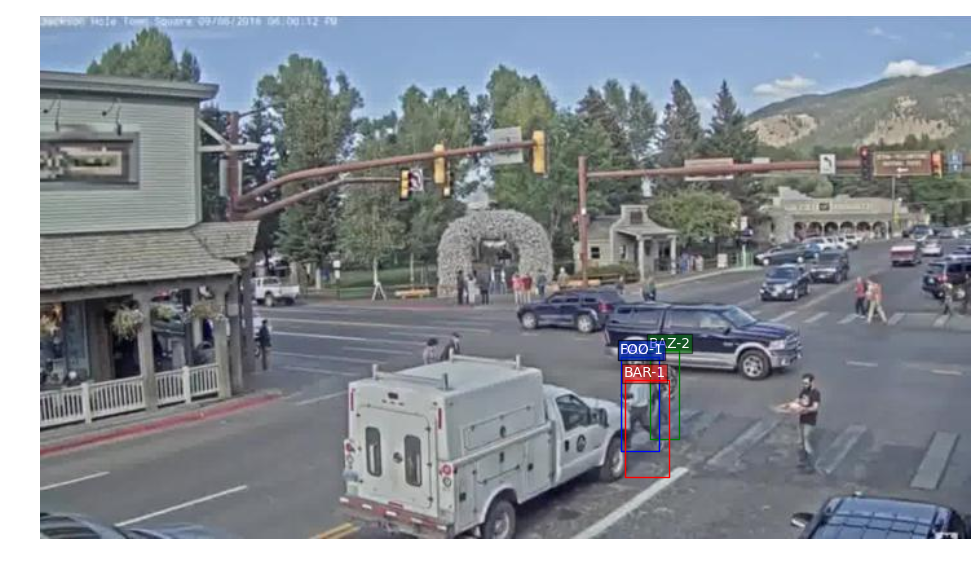

In [41]:
frame_num = 200
video_name = "jackson_hole.mp4" 

FOO_bboxes = parse_txt("FOO.txt")
BAR_bboxes = parse_txt("BAR.txt")
BAZ_bboxes = parse_txt("BAZ.txt")
annotations_map = {video_name: {"FOO": FOO_bboxes, "BAR": BAR_bboxes, "BAZ": BAZ_bboxes}}
workers = annotations_map[video_name].keys()

color_map = get_color_map(workers)
alert = get_alerts(annotations_map[video_name])
alerts = {video_name: alert}

visualize_alert(video_name, frame_num, alerts)

#bboxes = BAR_bboxes[frame_num].values()
#visualize_frame(video_name, frame_num, bboxes)

In [13]:
alert[frame_num]

{'isolation': {'BAR': {1: {'FOO': 0.334290937581614}},
  'FOO': {1: {'BAR': 0.334290937581614}}}}

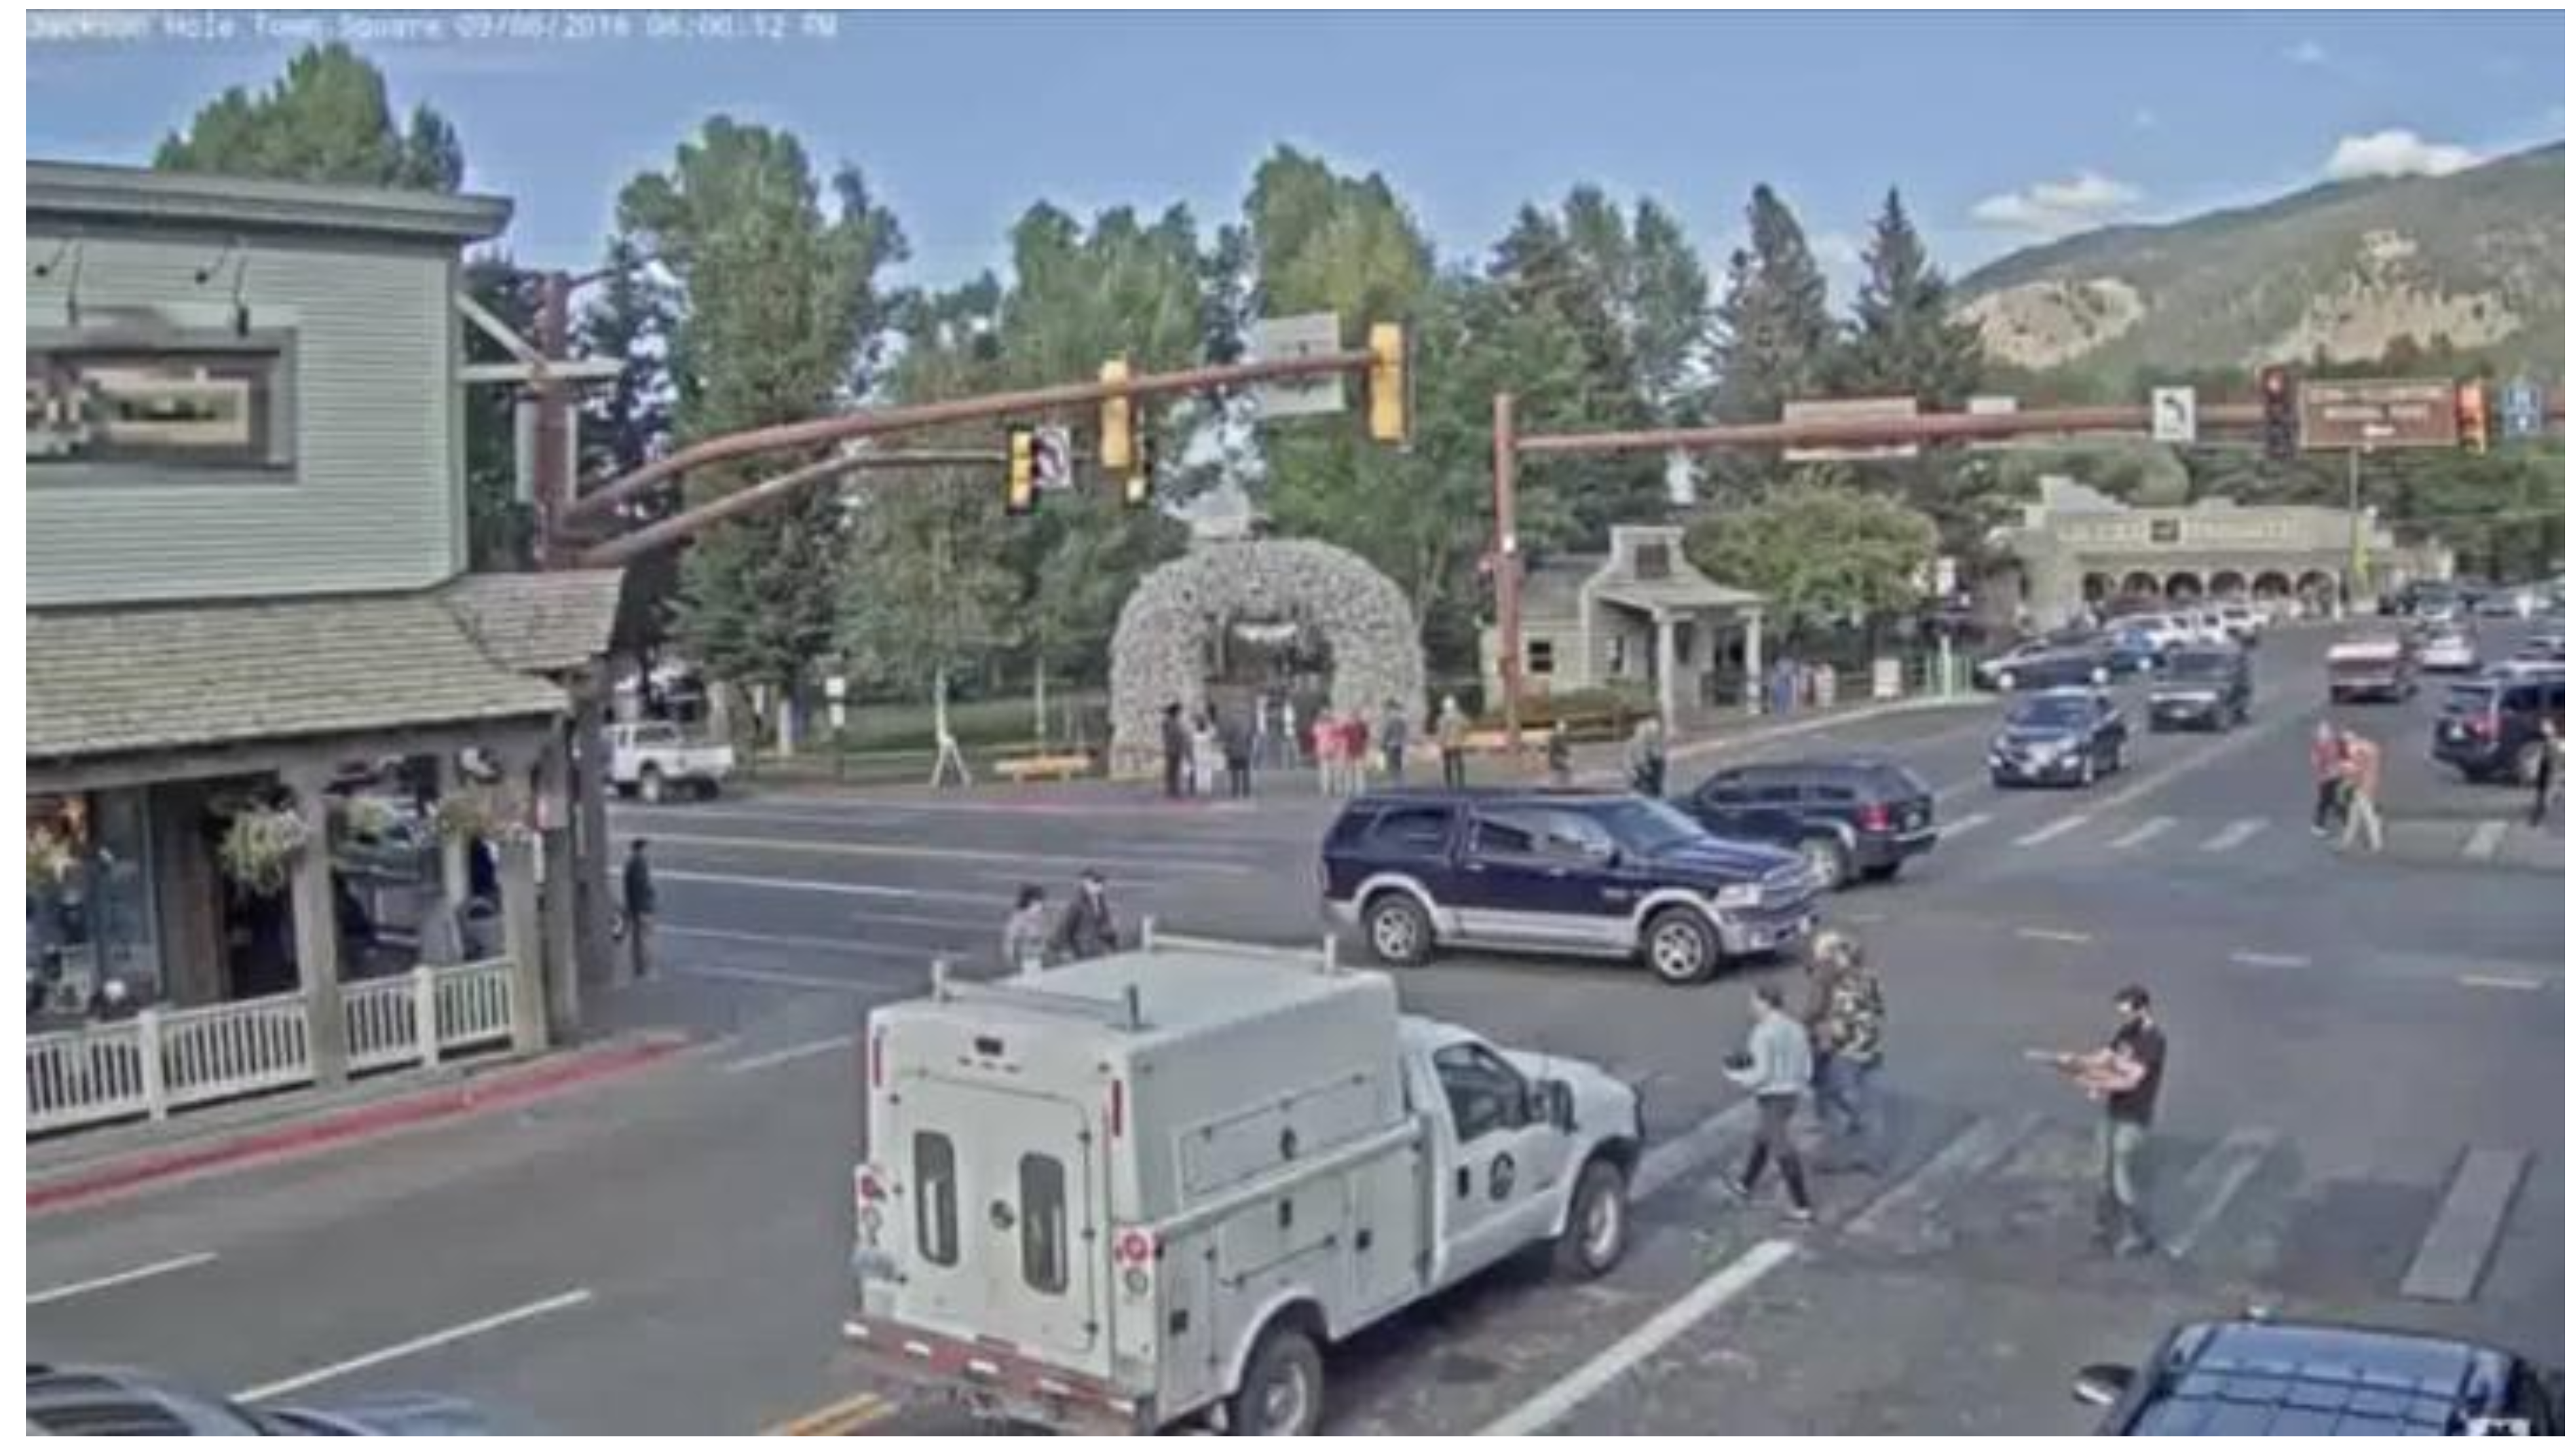

In [28]:

im_path = frame_to_path(video_name, frame_num)
img = imread(im_path)
plt.imshow(img)
plt.axis("off")
plt.show()